# CEDA to GeoCroissant Support

This notebook demonstrates how to work with CEDA data and convert it to GeoCroissant format for improved metadata standards and interoperability.

## Installation Requirements

First, we need to install the required mlcroissant package:

In [1]:
!pip install mlcroissant

## Setting up CEDA DataPoint Client

Install and import the CEDA DataPoint client for accessing CEDA data:

In [2]:
# Install dependencies
try:
    from ceda_datapoint import DataPointClient
except ImportError as exc:
    !pip install ceda-datapoint
    from ceda_datapoint import DataPointClient

## Initialize CEDA Client

Create a DataPointClient instance for the CEDA organization:

In [3]:
client = DataPointClient(org="CEDA")
client


<DataPointClient: CEDA-230311>
 - url: https://api.stac.ceda.ac.uk
 - organisation: CEDA

## Search CMIP6 Data

Search for CMIP6 climate data with specific filters:
- **Experiment**: SSP5-8.5 (high emissions scenario)
- **Activity**: ScenarioMIP (future climate projections)  
- **Institution**: KIOST (Korea Institute of Ocean Science and Technology)
- **Limit**: 10 items maximum

In [4]:
search_basic = client.search(
    collections=['cmip6'],
    query=[
        'cmip6:experiment_id=ssp585',
        'cmip6:activity_id=ScenarioMIP',
        'cmip6:institution_id=KIOST',
    ],
    max_items = 10
)

## Collect Cloud Assets

Collect cloud-optimized assets from the search results. This creates a cluster of cloud-optimized data products that can be efficiently accessed and processed.

In [5]:
cluster = search_basic.collect_cloud_assets()
cluster


<DataPointCluster: CEDA-230311-139746-274779 (Datasets: 10)>
 - url: https://api.stac.ceda.ac.uk
 - organisation: CEDA
 - search_terms: {'query': ['cmip6:experiment_id=ssp585', 'cmip6:activity_id=ScenarioMIP', 'cmip6:institution_id=KIOST'], 'max_items': 10}
 - collections: ['cmip6']
 - products: 10
Products:
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.vas.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.uas.gr1.v20210319-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.sfcWind.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.rsus.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.rsds.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.rlus.gr1.v20191106-

## Open Dataset from Product

Select and open a dataset from the cluster. This opens the third product (index 2) from the cluster as an xarray dataset.

In [6]:
product = cluster[2]
ds = product.open_dataset()

## Inspect Product Attributes

Explore the available methods and attributes of the product object:

In [7]:
dir(product)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_mapper',
 '_multiple_options',
 '_open_cfa',
 '_open_cog',
 '_open_kerchunk',
 '_open_zarr',
 '_prepare_dataset',
 '_set_visibility',
 'attributes',
 'bbox',
 'cloud_format',
 'collection',
 'end_datetime',
 'get_attribute',
 'help',
 'href',
 'id',
 'info',
 'meta',
 'open_asset',
 'open_dataset',
 'stac_attributes',
 'start_datetime',
 'units',
 'variables']

## Find and Visualize Temperature Data

Search for temperature (TAS) data within the cluster and create a visualization. This code:
- Searches for products containing "tas" (near-surface air temperature)
- Opens the dataset and selects a specific timestamp
- Creates a plot of the temperature data

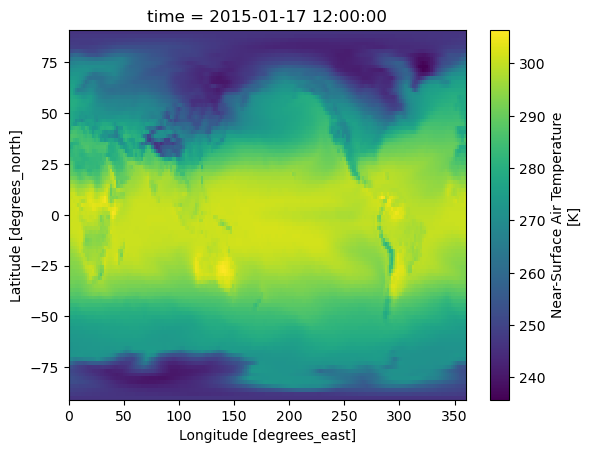

In [8]:
tas_product = None

for product in cluster:
    if "tas" in product.id:
        tas_product = product
        break

if tas_product:
    ds = tas_product.open_dataset()
    ds.tas.sel(time="2015-01-17 12:00:00").squeeze().plot()
else:
    print("tas variable not found in cluster")

## Explore STAC Attributes

Examine the STAC (SpatioTemporal Asset Catalog) attributes of the temperature product:

In [9]:
for product in cluster:
    if "tas" in product.id:
        print(product.id)
        print(product.stac_attributes.keys())
        print(product.stac_attributes)
        break

CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])
{'type': 'Feature', 'stac_version': '1.1.0', 'stac_extensions': ['https://stac-extensions.github.io/cmip6/v1.0.0/schema.json'], 'id': 'CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'geometry': {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}, 'bbox': [-179.0625, -90.0, 179.0625, 90.0], 'links': [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 

## Product Overview

Get an overview of all products in the cluster and their available STAC attributes:

In [10]:
for product in cluster:
    print(f"\nProduct ID: {product.id}")
    print("Available stac_attributes keys:", product.stac_attributes.keys())


Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.vas.gr1.v20191106-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.uas.gr1.v20210319-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.sfcWind.gr1.v20191106-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.s

## List TAS Products

Filter and list all products that contain temperature (TAS) data:

In [11]:
tas_products = [p for p in cluster if "tas" in p.id]

for p in tas_products:
    print(p.id)

CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file


## Extract Detailed Metadata

Access and display detailed metadata for the selected TAS product:

In [12]:
# Access metadata for the selected 'tas' product
if tas_product:
    metadata = tas_product.stac_attributes
    print("STAC Metadata for Product ID:", tas_product.id)
    print("STAC Attributes:", metadata)

    # If you'd like to see more details or other attributes:
    for key, value in metadata.items():
        print(f"{key}: {value}")
else:
    print("tas product not found.")

STAC Metadata for Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
STAC Attributes: {'type': 'Feature', 'stac_version': '1.1.0', 'stac_extensions': ['https://stac-extensions.github.io/cmip6/v1.0.0/schema.json'], 'id': 'CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'geometry': {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}, 'bbox': [-179.0625, -90.0, 179.0625, 90.0], 'links': [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 'title': 'CMIP6'}, {'rel': 'root', 'href': 'https://api.s

## Display Structured Metadata

Extract and display key STAC metadata fields in a structured format:

In [13]:
if tas_product:
    # Extract STAC metadata fields
    metadata = tas_product.stac_attributes
    item_metadata = {
        "ID": tas_product.id,
        "Type": metadata.get("type"),
        "STAC Version": metadata.get("stac_version"),
        "Collection": metadata.get("collection"),
        "Links": metadata.get("links"),
        "Bounding Box": metadata.get("bbox"),
        "Geometry": metadata.get("geometry")
    }

    # Display metadata
    for key, value in item_metadata.items():
        print(f"{key}: {value}")
else:
    print("tas product not found.")

ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
Type: Feature
STAC Version: 1.1.0
Collection: cmip6
Links: [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 'title': 'CMIP6'}, {'rel': 'root', 'href': 'https://api.stac.ceda.ac.uk', 'type': 'application/json', 'title': 'CEDA STAC API'}]
Bounding Box: [-179.0625, -90.0, 179.0625, 90.0]
Geometry: {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}


## Inspect TAS Product Methods

List all available methods and attributes for the TAS product:

In [14]:
print(dir(tas_product))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_mapper', '_multiple_options', '_open_cfa', '_open_cog', '_open_kerchunk', '_open_zarr', '_prepare_dataset', '_set_visibility', 'attributes', 'bbox', 'cloud_format', 'collection', 'end_datetime', 'get_attribute', 'help', 'href', 'id', 'info', 'meta', 'open_asset', 'open_dataset', 'stac_attributes', 'start_datetime', 'units', 'variables']


## Explore Product Attributes

Check various attributes of the TAS product including variables, STAC attributes, and general attributes:

In [15]:
# Try checking the 'variables' attribute to see if the data is present there
print(tas_product.variables)

# Or inspect the 'stac_attributes' for any relevant metadata
print(tas_product.stac_attributes)

# You can also explore 'attributes' if the other two don't help
print(tas_product.attributes)

WARNING [ceda_datapoint.mixins.properties]: Attribute not found from options: ['variables', 'variable_long_name']


None
{'type': 'Feature', 'stac_version': '1.1.0', 'stac_extensions': ['https://stac-extensions.github.io/cmip6/v1.0.0/schema.json'], 'id': 'CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'geometry': {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}, 'bbox': [-179.0625, -90.0, 179.0625, 90.0], 'links': [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 'title': 'CMIP6'}, {'rel': 'root', 'href': 'https://api.stac.ceda.ac.uk', 'type': 'application/json', 'title': 'CEDA STAC API'}], 'collection': 'cmip6'}
{'title': 'CMIP6.ScenarioMIP.KIOST

## Inspect Product Assets

Detailed inspection of product structure and available assets through STAC attributes:

In [16]:
# Let's inspect the product structure to understand how to access assets
if tas_product:
    print("Product type:", type(tas_product))
    print("Product methods:", [method for method in dir(tas_product) if not method.startswith('_')])
    
    # Try to access assets through STAC attributes
    stac_attrs = tas_product.stac_attributes
    if 'assets' in stac_attrs:
        assets = stac_attrs['assets']
        print(f"\nAssets found in stac_attributes: {type(assets)}")
        print(f"Number of assets: {len(assets)}")
        
        for asset_key, asset in assets.items():
            print(f"\nAsset key: {asset_key}")
            print(f"Asset type: {type(asset)}")
            print(f"Asset content: {asset}")
            if hasattr(asset, 'keys'):
                print(f"Asset keys: {asset.keys()}")
            break  # Just examine the first asset
    else:
        print("No 'assets' found in stac_attributes")
        print("Available keys in stac_attributes:", stac_attrs.keys())

Product type: <class 'ceda_datapoint.core.cloud.DataPointCloudProduct'>
Product methods: ['attributes', 'bbox', 'cloud_format', 'collection', 'end_datetime', 'get_attribute', 'help', 'href', 'id', 'info', 'meta', 'open_asset', 'open_dataset', 'stac_attributes', 'start_datetime', 'units', 'variables']
No 'assets' found in stac_attributes
Available keys in stac_attributes: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])


## Generate GeoCroissant Metadata

Convert STAC metadata to GeoCroissant format. This comprehensive process:

1. **Fetches STAC metadata** via CEDA DataPointClient
2. **Creates GeoCroissant-compliant metadata** with proper schema context
3. **Adds asset distribution information** from the STAC item
4. **Saves the metadata** to a JSON file

GeoCroissant extends the Croissant standard with geospatial capabilities, making climate data more discoverable and interoperable.

In [17]:
import json
import requests
from ceda_datapoint import DataPointClient
from copy import deepcopy

# Step 1: Fetch the STAC metadata via CEDA DataPointClient
client = DataPointClient(org="CEDA")
search = client.search(
    collections=["cmip6"],
    query=[
        "cmip6:experiment_id=ssp585",
        "cmip6:activity_id=ScenarioMIP",
        "cmip6:institution_id=KIOST",
        "cmip6:variable_id=tas",
    ],
    max_items=1
)

item_key, stac_item = next(iter(search.items.items()))
stac_dict = getattr(stac_item, "stac_attributes", {})
api_item_url = next((link.get("href") for link in stac_dict.get("links", []) if link.get("rel") == "self"), None)

if not api_item_url:
    raise ValueError(" Could not find canonical STAC 'self' URL.")

stac_json = requests.get(api_item_url).json()

# Step 2: Create GeoCroissant-compliant metadata
dataset_id = stac_json.get("id")
name = stac_json.get("title", dataset_id)
version = stac_json.get("properties", {}).get("version", "v1")
institution = stac_json.get("properties", {}).get("institution_id", "Unknown")
start_date = stac_json.get("properties", {}).get("start_datetime", "")
end_date = stac_json.get("properties", {}).get("end_datetime", "")

croissant = {
    "@context": {
        "@language": "en",
        "@vocab": "https://schema.org/",
        "cr": "http://mlcommons.org/croissant/",
        "geocr": "http://mlcommons.org/geocroissant/",
        "dct": "http://purl.org/dc/terms/",
        "sc": "https://schema.org/",
        "citeAs": "cr:citeAs",
        "column": "cr:column",
        "conformsTo": "dct:conformsTo",
        "data": {"@id": "cr:data", "@type": "@json"},
        "dataBiases": "cr:dataBiases",
        "dataCollection": "cr:dataCollection",
        "dataType": {"@id": "cr:dataType", "@type": "@vocab"},
        "extract": "cr:extract",
        "field": "cr:field",
        "fileProperty": "cr:fileProperty",
        "fileObject": "cr:fileObject",
        "format": "cr:format",
        "includes": "cr:includes",
        "isLiveDataset": "cr:isLiveDataset",
        "jsonPath": "cr:jsonPath",
        "key": "cr:key",
        "md5": {"@id": "cr:md5", "@type": "sc:Text"},
        "sha256": {"@id": "cr:sha256", "@type": "sc:Text"},
        "parentField": "cr:parentField",
        "path": "cr:path",
        "personalSensitiveInformation": "cr:personalSensitiveInformation",
        "recordSet": "cr:recordSet",
        "references": "cr:references",
        "regex": "cr:regex",
        "repeated": "cr:repeated",
        "replace": "cr:replace",
        "separator": "cr:separator",
        "source": "cr:source",
        "subField": "cr:subField",
        "transform": "cr:transform"
    },
    "@type": "Dataset",
    "@id": dataset_id,
    "name": name,
    "description": stac_json.get("description", "CMIP6 climate model output dataset."),
    "version": version,
    "license": stac_json.get("license", "CC-BY-4.0"),
    "conformsTo": "http://mlcommons.org/croissant/1.0",
    "creator": {
        "@type": "Organization",
        "name": institution
    },
    "publisher": {
        "@type": "Organization",
        "name": "Centre for Environmental Data Analysis (CEDA)"
    },
    "citation": "CMIP6 climate model output. ScenarioMIP experiment by KIOST-ESM under ssp585 scenario.",
    "isAccessibleForFree": True,
    "includedInDataCatalog": {
        "@type": "DataCatalog",
        "name": "CEDA Archive",
        "url": "https://catalogue.ceda.ac.uk/"
    },
    "spatialCoverage": {
        "@type": "Place",
        "geo": {
            "@type": "GeoShape",
            "box": "-90.0 -179.0625 90.0 179.0625"
        }
    },
    "temporalCoverage": f"{start_date}/{end_date}",
    "url": api_item_url,
    "keywords": ["CMIP6", "climate", "ssp585", "tas", "ScenarioMIP", "temperature", "KIOST"],
    "variableMeasured": [
        {
            "@type": "PropertyValue",
            "name": stac_json.get("properties", {}).get("variable_id", "tas"),
            "description": "Near surface air temperature"
        }
    ],
    "dataCollection": {
        "@type": "DataCollection",
        "name": "Coupled Model Intercomparison Project Phase 6 (CMIP6)"
    },
    "datePublished": start_date,
    "dct:temporal": {
        "startDate": start_date,
        "endDate": end_date
    },
    "geocr:BoundingBox": stac_json.get("bbox", []),
    "geocr:summaries": {
        "platform": stac_json.get("properties", {}).get("platform", []),
        "instruments": stac_json.get("properties", {}).get("instrument", [])
    },
    "references": [
        {
            "@type": "CreativeWork",
            "url": api_item_url,
            "name": "STAC Item",
            "encodingFormat": "application/json"
        }
    ],
    "distribution": [],
    "recordSet": [
        {
            "@type": "cr:RecordSet",
            "name": "CMIP6-records",
            "field": [
                {
                    "@type": "cr:Field",
                    "name": "time",
                    "description": "Time of measurement"
                },
                {
                    "@type": "cr:Field",
                    "name": "tas",
                    "description": "Near surface air temperature (K)"
                }
            ]
        }
    ]
}

# Step 3: Add unique asset links to 'distribution'
assets = stac_json.get("assets", {})
added_urls = set()

for asset_name, asset in assets.items():
    url = asset.get("href")
    if url in added_urls:
        continue
    added_urls.add(url)

    file_object = {
        "@type": "cr:FileObject",
        "name": asset_name,
        "description": asset.get("title", asset_name),
        "contentUrl": url,
        "encodingFormat": asset.get("type", "application/octet-stream")
    }

    croissant["distribution"].append(deepcopy(file_object))

# Step 4: Save to disk
with open("cmip6_geocroissant_metadata.json", "w") as f:
    json.dump(croissant, f, indent=2)

print("GeoCroissant JSON-LD written to 'cmip6_geocroissant_metadata.json'")

GeoCroissant JSON-LD written to 'cmip6_geocroissant_metadata.json'


## Display GeoCroissant Metadata

Load and display the generated GeoCroissant metadata in a formatted way:

In [18]:
import json

# Load your metadata
with open("cmip6_geocroissant_metadata.json") as f:
    metadata = json.load(f)

# Pretty-print
print(json.dumps(metadata, indent=2))


{
  "@context": {
    "@language": "en",
    "@vocab": "https://schema.org/",
    "cr": "http://mlcommons.org/croissant/",
    "geocr": "http://mlcommons.org/geocroissant/",
    "dct": "http://purl.org/dc/terms/",
    "sc": "https://schema.org/",
    "citeAs": "cr:citeAs",
    "column": "cr:column",
    "conformsTo": "dct:conformsTo",
    "data": {
      "@id": "cr:data",
      "@type": "@json"
    },
    "dataBiases": "cr:dataBiases",
    "dataCollection": "cr:dataCollection",
    "dataType": {
      "@id": "cr:dataType",
      "@type": "@vocab"
    },
    "extract": "cr:extract",
    "field": "cr:field",
    "fileProperty": "cr:fileProperty",
    "fileObject": "cr:fileObject",
    "format": "cr:format",
    "includes": "cr:includes",
    "isLiveDataset": "cr:isLiveDataset",
    "jsonPath": "cr:jsonPath",
    "key": "cr:key",
    "md5": {
      "@id": "cr:md5",
      "@type": "sc:Text"
    },
    "sha256": {
      "@id": "cr:sha256",
      "@type": "sc:Text"
    },
    "parentField": 

## Load and Visualize Data Using GeoCroissant

Use the GeoCroissant metadata to load and visualize the actual climate data. This process demonstrates the full workflow:

1. **Load GeoCroissant metadata** from the generated JSON file
2. **Extract Kerchunk reference URL** for cloud-optimized access
3. **Set up fsspec reference filesystem** for efficient data access
4. **Open dataset with xarray** using the Zarr engine
5. **Create visualizations** of temperature data

This shows how GeoCroissant metadata enables seamless data discovery and access.

Dataset loaded successfully:
<xarray.Dataset> Size: 76MB
Dimensions:    (lat: 96, bnds: 2, lon: 192, time: 1032)
Coordinates:
  * lat        (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.563 ... 355.3 357.2 359.1
  * time       (time) object 8kB 2015-01-17 12:00:00 ... 2100-12-17 12:00:00
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 76MB ...
    time_bnds  (time, bnds) object 17kB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60266.0
    branch_time_in_parent:  60266.0
    cmor_version:           3.5.0
    ...                     ...
    table_id:               Amon
    table_info:             Creation Date:(30 April 2019) MD5:cc2ae51c23960ce...
    title:       

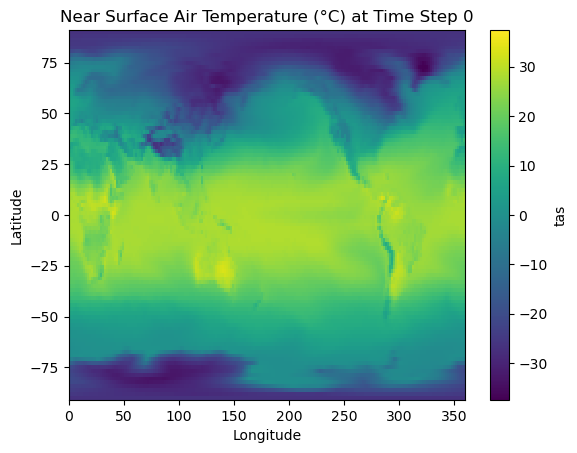

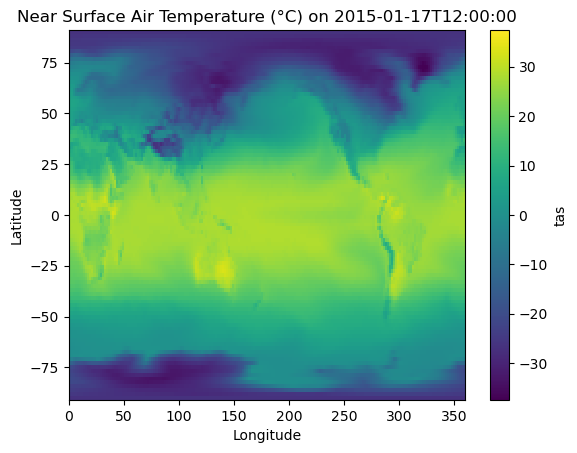

In [19]:
import json
import fsspec
import xarray as xr
import matplotlib.pyplot as plt

# Step 1: Load GeoCroissant metadata
with open("cmip6_geocroissant_metadata.json", "r") as f:
    metadata = json.load(f)

# Step 2: Get Kerchunk reference JSON URL (Zarr-style)
kerchunk_url = None
for dist in metadata.get("distribution", []):
    if dist.get("encodingFormat") == "application/zstd":
        kerchunk_url = dist["contentUrl"]
        break

if not kerchunk_url:
    raise ValueError("No kerchunk reference file found in metadata.")

# Step 3: Load the remote kerchunk reference JSON
fs = fsspec.filesystem("https")
with fs.open(kerchunk_url) as f:
    reference = json.load(f)

# Step 4: Set up the reference file system using fsspec
fs_ref = fsspec.filesystem(
    "reference",
    fo=reference,
    remote_protocol="https",
    remote_options={}
)

# Step 5: Create mapper and open dataset using xarray + zarr engine
mapper = fs_ref.get_mapper("")
ds = xr.open_dataset(mapper, engine="zarr", backend_kwargs={"consolidated": False})

# Step 6: Print dataset summary
print("Dataset loaded successfully:")
print(ds)

# Step 7: Plot tas at first time step (converted to Celsius)
tas_celsius = ds['tas'].isel(time=0) - 273.15
tas_celsius.plot(cmap='viridis')
plt.title("Near Surface Air Temperature (°C) at Time Step 0")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Optional Step 8: Plot a specific timestamp (if known and present)
try:
    selected_time = "2015-01-17T12:00:00"
    (ds['tas'].sel(time=selected_time) - 273.15).squeeze().plot(cmap='viridis')
    plt.title(f"Near Surface Air Temperature (°C) on {selected_time}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
except KeyError:
    print(f"Time {selected_time} not found in dataset.")